In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
# The Data

In [ ]:
df=pd.read_csv('titanic_train.csv')

In [ ]:
df.head()

# Exploratory Data Analysis

In [ ]:
df.isnull()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

In [ ]:
# otherway  to see the distribution

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
sns.countplot(x='SibSp',data=df)

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning
#We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

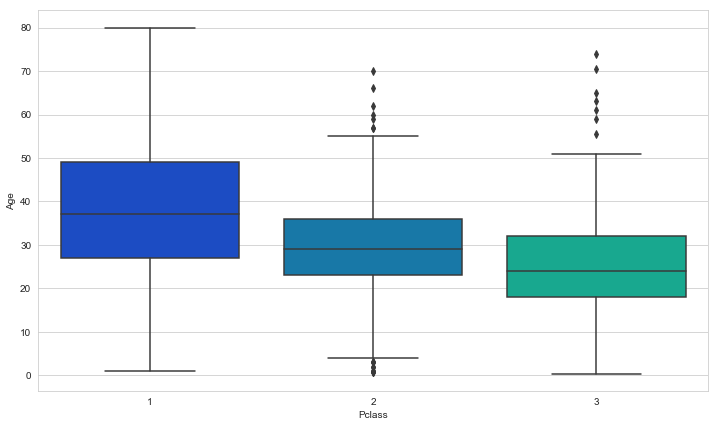

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

#We can see the wealthier passengers in the higher classes tend to be older, 
#which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [24]:
# Now let's apply  apply that function!

In [26]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [27]:
# let's check the heatmap again

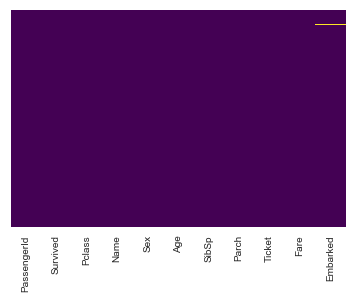

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df.drop('Cabin',axis=1,inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
df.dropna(inplace=True)

# Converting Categorical Features

# We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [34]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [36]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [37]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
df=pd.concat([df,sex,embark],axis=1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
# now our data is ready for our model

In [43]:
# Building a Logistic Regression model

In [44]:
# Train Test Split

In [45]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [46]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\kiit1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
accuracy=confusion_matrix(y_test,predictions)

In [55]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [58]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [59]:
# Let's move on to evaluate our model!



In [60]:
# evaluation

In [61]:
# We can check precision,recall,f1-score using classification report!

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

